In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
clicks = pd.read_csv('../data/clicks.csv')
eventos = pd.read_csv('../data/events.csv')

/home/pablocruz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')

In [15]:
fechaDeEventos = pd.to_datetime(eventos['date'])
fechaDeEventos.head()

0   2019-03-05 00:09:36.966
1   2019-03-05 00:09:38.920
2   2019-03-05 00:09:26.195
3   2019-03-05 00:09:31.107
4   2019-03-09 21:00:36.585
Name: date, dtype: datetime64[ns]

In [16]:
fechaDeClicks = pd.to_datetime(clicks['created'])
fechaDeClicks.head()

0   2019-03-06 22:42:12.755
1   2019-03-08 10:24:30.641
2   2019-03-08 15:24:16.069
3   2019-03-06 03:08:51.543
4   2019-03-06 03:32:55.570
Name: created, dtype: datetime64[ns]

In [17]:
dia = fechaDeClicks.dt.date
dia.value_counts()

2019-03-12    5204
2019-03-11    4557
2019-03-10    3966
2019-03-13    3468
2019-03-09    3283
2019-03-07    2989
2019-03-08    2839
2019-03-05      31
2019-03-06      14
Name: created, dtype: int64

In [18]:
#cantidad de clicks por hora
horaDeClicks = pd.to_datetime(fechaDeClicks.dt.strftime('%Y-%m-%d %H'))
horaDeClicks.value_counts().head()

2019-03-07 23:00:00    2172
2019-03-09 01:00:00    1154
2019-03-08 01:00:00     988
2019-03-10 02:00:00     887
2019-03-11 01:00:00     878
Name: created, dtype: int64

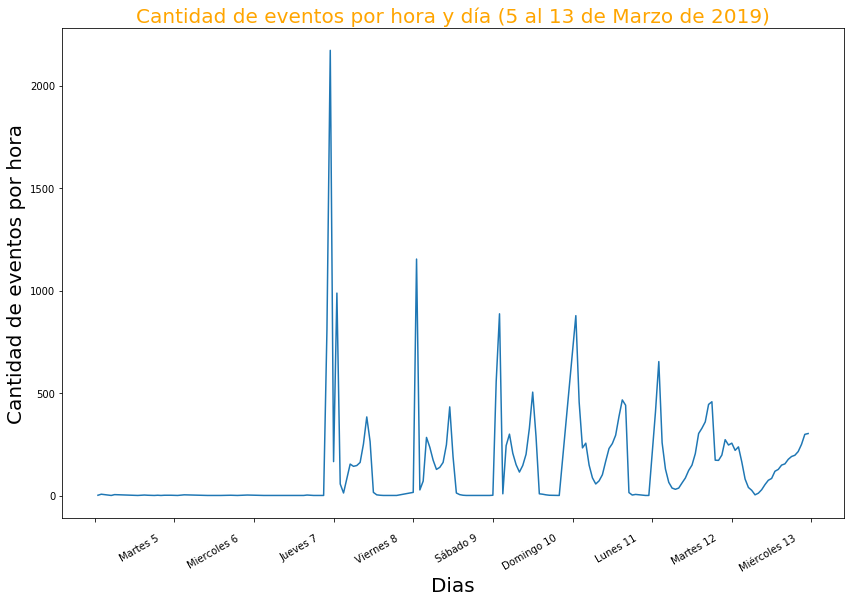

In [19]:
plot = horaDeClicks.value_counts().plot(kind='line',figsize=(14,10))
plot.set_title('Cantidad de eventos por hora y día (5 al 13 de Marzo de 2019)', fontsize=20,color = 'orange')
plot.set_xlabel('Dias',fontsize=20)
plot.set_ylabel('Cantidad de eventos por hora',fontsize=20)
espacio = ''
plot.set_xticklabels(['', 'Martes 5     ', 'Miercoles 6     ', 'Jueves 7     ', 'Viernes 8     ', 'Sábado 9     ', 'Domingo 10     ', 'Lunes 11     ', 'Martes 12     ', 'Miércoles 13     '])
plt.show()

In [20]:
#Podemos ver q todos los clicks registrados no fueron con conexion wifi
cantFilas = clicks.shape[0]
print('cantidad de Filas: ',cantFilas)
clicks['wifi_connection'].value_counts()

cantidad de Filas:  26351


False    26351
Name: wifi_connection, dtype: int64

In [21]:
jamppsClient = clicks['advertiser_id'].value_counts().reset_index()
jamppsClient.columns=['advertiser_id','count']
jamppsClient


,advertiser_id,count
0,3,26263
1,0,70
2,2,12
3,7,2
4,1,2
5,8,1
6,5,1


In [22]:
bestJamppsClient = jamppsClient[jamppsClient['advertiser_id']==3]['count'].sum()
othersJamppsClient = jamppsClient[jamppsClient['advertiser_id']!=3]['count'].sum()

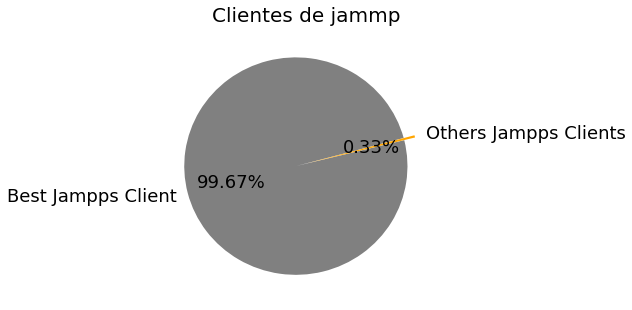

In [23]:
plot = plt.figure(figsize=(5, 5))
nombres = ['Best Jampps Client', 'Others Jampps Clients']
plot = plt.title('Clientes de jammp', fontsize=20)
plot = plt.pie([bestJamppsClient,othersJamppsClient], labels=nombres, autopct='%1.2f%%', startangle=15, colors=['grey', 'orange'], explode=(0.1, 0),shadow = False, textprops={'fontsize': 18})
plt.show()

In [24]:
#fila llena de NaNs
clicks['action_id'].value_counts()

Series([], Name: action_id, dtype: int64)

In [25]:
#Identificación interna de la fuente (intercambio) desde la cual se originó el clic
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

In [26]:
#datos sobre un solo pais 
clicks['country_code'].value_counts()

6,33359710263339E+018    26351
Name: country_code, dtype: int64

In [27]:
clicks['latitude'].value_counts().head()

1.205689    22949
1.218924     1105
1.235406      281
1.205393      261
1.208059      186
Name: latitude, dtype: int64

In [28]:
clicks['longitude'].value_counts().head()

1.070234    22949
1.071209     1105
1.063737      281
1.077238      250
1.069624      186
Name: longitude, dtype: int64

In [29]:
#Ubicacion de los 5 lugares donde mas se hizo clicks
latitude = clicks['latitude'].value_counts().head().reset_index()
latitude.columns = ['latitude','count']
display(latitude)

longitude = clicks['longitude'].value_counts().head().reset_index()
longitude.columns = ['longitude','count']
display(longitude)


location = pd.merge(latitude,longitude)
location[['latitude','longitude','count']]

,latitude,count
0,1.205689,22949
1,1.218924,1105
2,1.235406,281
3,1.205393,261
4,1.208059,186


,longitude,count
0,1.070234,22949
1,1.071209,1105
2,1.063737,281
3,1.077238,250
4,1.069624,186


,latitude,longitude,count
0,1.205689,1.070234,22949
1,1.218924,1.071209,1105
2,1.235406,1.063737,281
3,1.208059,1.069624,186


Text(0,0.5,'mobile carrier of the device')

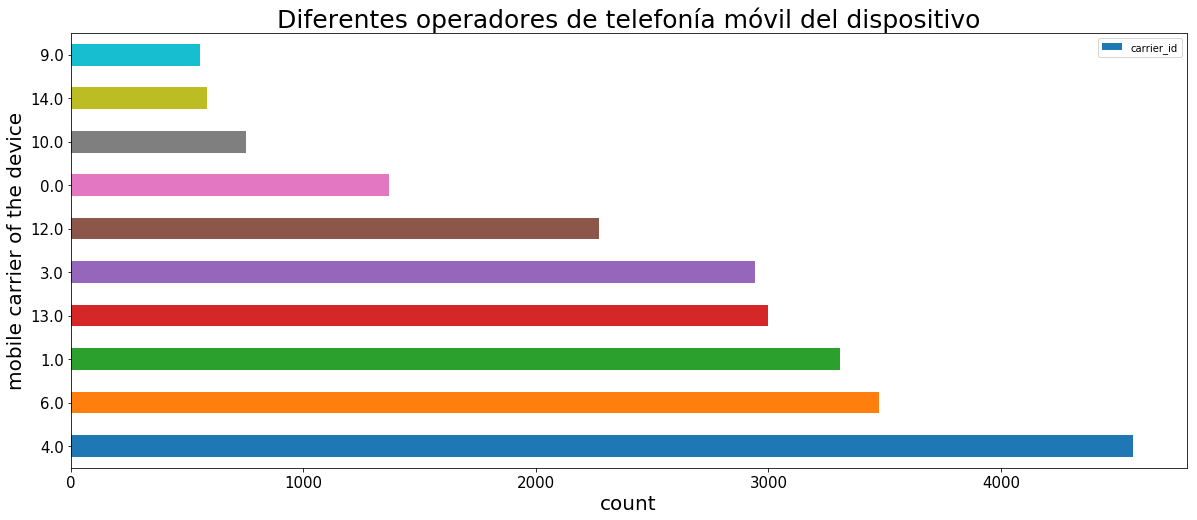

In [30]:
#diferentes operadores de telefonía móvil del dispositivo
##cambiar nombres aiuuuda
ax = clicks['carrier_id'].value_counts().head(10).plot(kind='barh', figsize=(20, 8), legend=True, fontsize=15)
ax.set_title("Diferentes operadores de telefonía móvil del dispositivo", fontsize=25)
ax.set_xlabel("count", fontsize=20)
ax.set_ylabel("mobile carrier of the device", fontsize=20)


In [31]:
#agente para el dispositivo en el que se realizó el clic (modelo)
#Los 5 modelos con mas frecuencia
clicks['agent_device'].value_counts().head()

3.516812e+18    656
1.754528e+18    326
6.882415e+18    156
7.787531e+18    132
4.281729e+18    122
Name: agent_device, dtype: int64

In [32]:
#... no se sabe q es specs brand
clicks['specs_brand'].value_counts()

3,92184377613098E+017    16172
2,73303597766644E+018    10164
8,93060513294791E+018       10
3,85516778853128E+018        4
5,67529598527356E+018        1
Name: specs_brand, dtype: int64

In [33]:
# marca del dispositivo
# frecuencia de la marca de dispositivos donde se registraron mas clicks
clicks['brand'].value_counts()

2.0     2027
0.0     1917
1.0     1521
4.0      240
3.0      186
5.0      129
6.0      124
7.0       32
9.0       31
8.0       16
10.0       8
12.0       3
13.0       1
Name: brand, dtype: int64

In [34]:
#no se establece ningun patron en el tiempo en el q hace un click.
clicks['timeToClick'].value_counts()

261.00        11
0.21           9
267.00         9
338.00         9
232.00         8
2041.00        8
2043.00        8
2221.00        8
252.00         8
1676.00        7
0.34           7
4179.00        7
187.00         7
2892.00        7
1917.00        7
1717.00        7
251.00         7
194.00         7
2252.00        7
352.00         6
2199.00        6
2079.00        6
236.00         6
0.18           6
237.00         6
277.00         6
1839.00        6
2532.00        6
196.00         6
226.00         6
              ..
1246.00        1
209891.00      1
104946.00      1
4427.00        1
102252.00      1
152562.00      1
5266.00        1
11736.00       1
9642.00        1
1373.00        1
8908.00        1
370656.00      1
419807.00      1
209066.00      1
185327.00      1
1.30           1
371025.00      1
305113.00      1
354263.00      1
272342.00      1
12493.00       1
3697.00        1
4953.00        1
18045.00       1
406514.00      1
79548.00       1
335137.00      1
8177096.00    

In [35]:
clicks[['touchX','touchY']].head()

,touchX,touchY
0,905.0,78.0
1,NaN,NaN
2,946.0,473.0
3,35.0,431.0
4,54.0,423.0


Text(0,0.5,'touchY')

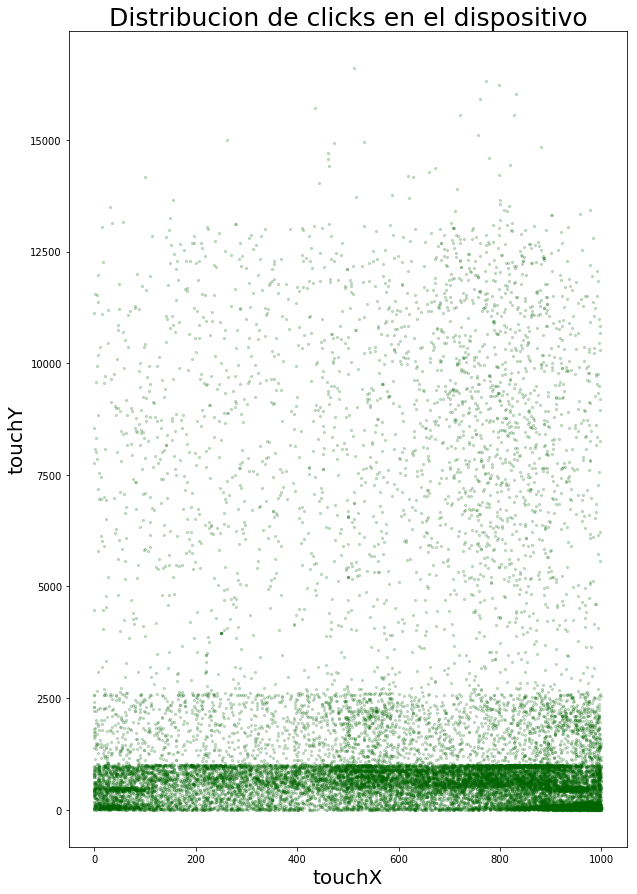

In [73]:
# library & dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 15))
## use the function regplot to make a scatterplot Without regression fit:
ax = sns.regplot(x=clicks['touchX'], y=clicks['touchY'], fit_reg=False, scatter_kws={"color":"darkgreen","alpha":0.2,"s":5} )

ax.set_title("Distribucion de clicks en el dispositivo", fontsize=25)
ax.set_xlabel("touchX", fontsize=20)
ax.set_ylabel("touchY", fontsize=20)

In [56]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')